In [96]:
import sys
import datetime as dt
import urllib.request
import pandas as pd
import numpy as npy
from pathlib import Path
from scipy.stats import pearsonr
from matplotlib import pyplot as plt

In [2]:
PROJPATH = Path().resolve().parent
sys.path.append((PROJPATH / 'src').as_posix())
from predictors_remote import d_urls

In [ ]:
datadir = PROJPATH / 'data'
timestamp = dt.datetime.now().strftime("%Y%m%d%H%M")

## Download data

In [125]:
outpath = datadir / 'working'

Seaice

In [5]:
d_urls.ICEURLS

[{'name': 'Beaufort_area_monthly',
  'skipentry': False,
  'URL': 'https://www.ncei.noaa.gov/access/monitoring/regional-sea-ice/area/Beaufort/0/data.csv'},
 {'name': 'Beaufort_extent_monthly',
  'skipentry': False,
  'URL': 'https://www.ncei.noaa.gov/access/monitoring/regional-sea-ice/extent/Beaufort/0/data.csv'},
 {'name': 'Chukchi_area_monthly',
  'skipentry': False,
  'URL': 'https://www.ncei.noaa.gov/access/monitoring/regional-sea-ice/area/Chukchi/0/data.csv'},
 {'name': 'Chukchi_extent_monthly',
  'skipentry': False,
  'URL': 'https://www.ncei.noaa.gov/access/monitoring/regional-sea-ice/extent/Chukchi/0/data.csv'},
 {'name': 'Bering_area_monthly',
  'skipentry': False,
  'URL': 'https://www.ncei.noaa.gov/access/monitoring/regional-sea-ice/area/Bering/0/data.csv'},
 {'name': 'Bering_extent_monthly',
  'skipentry': False,
  'URL': 'https://www.ncei.noaa.gov/access/monitoring/regional-sea-ice/extent/Bering/0/data.csv'}]

In [6]:
for item in d_urls.ICEURLS:
    url = item['URL']
    fn = f"{item['name']}.txt"
    if item['skipentry']:
        print(f"skipping {fn} at {url}")
        continue
    print(f"retrieving {fn} from {url}")
    urllib.request.urlretrieve(url, outpath / fn)

retrieving Beaufort_area_monthly.txt from https://www.ncei.noaa.gov/access/monitoring/regional-sea-ice/area/Beaufort/0/data.csv
retrieving Beaufort_extent_monthly.txt from https://www.ncei.noaa.gov/access/monitoring/regional-sea-ice/extent/Beaufort/0/data.csv
retrieving Chukchi_area_monthly.txt from https://www.ncei.noaa.gov/access/monitoring/regional-sea-ice/area/Chukchi/0/data.csv
retrieving Chukchi_extent_monthly.txt from https://www.ncei.noaa.gov/access/monitoring/regional-sea-ice/extent/Chukchi/0/data.csv
retrieving Bering_area_monthly.txt from https://www.ncei.noaa.gov/access/monitoring/regional-sea-ice/area/Bering/0/data.csv
retrieving Bering_extent_monthly.txt from https://www.ncei.noaa.gov/access/monitoring/regional-sea-ice/extent/Bering/0/data.csv


Teleconnections

In [6]:
d_urls.TELECONNECTIONURLS

[{'name': 'Arctic_Oscillation',
  'shortname': 'AO',
  'format': 'PSL',
  'nodata': -999,
  'skipfooter': 3,
  'skipentry': False,
  'URL': 'https://psl.noaa.gov/data/correlation/ao.data'},
 {'name': 'EastPac_NorthPac',
  'shortname': 'EP-NP',
  'skipfooter': 3,
  'format': 'PSL',
  'nodata': -99.9,
  'skipentry': False,
  'URL': 'https://psl.noaa.gov/data/correlation/epo.data'},
 {'name': 'Pacific_NA',
  'shortname': 'PNA',
  'format': 'PSL',
  'nodata': -99.9,
  'skipfooter': 3,
  'skipentry': False,
  'URL': 'https://psl.noaa.gov/data/correlation/pna.data'},
 {'name': 'Southern_Osc',
  'shortname': 'SOI',
  'format': 'PSL',
  'nodata': -99.99,
  'skipfooter': 3,
  'skipentry': False,
  'URL': 'https://psl.noaa.gov/data/correlation/soi.data'},
 {'name': 'Nino1_2',
  'shortname': 'Nino1+2',
  'format': 'PSL',
  'nodata': -99.99,
  'skipfooter': 3,
  'skipentry': False,
  'URL': 'https://psl.noaa.gov/data/correlation/nina1.anom.data'},
 {'name': 'Nino3',
  'shortname': 'Nino3',
  'form

In [126]:
for item in d_urls.TELECONNECTIONURLS:
    url = item['URL']
    fn = f"{item['name']}.txt"
    if item['skipentry']:
        print(f"skipping {fn} at {url}")
        continue
    print(f"retrieving {fn} from {url}")
    opener = urllib.request.URLopener()
    opener.addheaders = [('User-agent', 'Mozilla/5.0')]
    filename, headers = opener.retrieve(url, outpath / fn)
    # urllib.request.urlretrieve(url, )

retrieving Arctic_Oscillation.txt from https://psl.noaa.gov/data/correlation/ao.data
retrieving EastPac_NorthPac.txt from https://psl.noaa.gov/data/correlation/epo.data
retrieving Pacific_NA.txt from https://psl.noaa.gov/data/correlation/pna.data
retrieving Southern_Osc.txt from https://psl.noaa.gov/data/correlation/soi.data
retrieving Nino1_2.txt from https://psl.noaa.gov/data/correlation/nina1.anom.data
retrieving Nino3.txt from https://psl.noaa.gov/data/correlation/nina3.anom.data
retrieving Nino34.txt from https://psl.noaa.gov/data/correlation/nina34.anom.data
retrieving Nino4.txt from https://psl.noaa.gov/data/correlation/nina4.anom.data
retrieving Pacific_Decadal.txt from https://www.ncei.noaa.gov/pub/data/cmb/ersst/v5/index/ersst.v5.pdo.dat
retrieving Oceanic_Nino.txt from https://psl.noaa.gov/data/correlation/oni.data
skipping North_Pac_Pattern.txt at https://climatedataguide.ucar.edu/sites/default/files/2024-04/npindex_monthly.txt
retrieving cpc_multiple_teleconn.txt from http

## Make seaice dataframe

#### With data from NCEI

In [7]:
# areas = ['Beaufort', 'Bering', 'Chukchi']
areas = ['Bering', 'Chukchi']   # not much change in Beaufort Sea ice
suffix = 'area_monthly.txt'
fpths = [datadir / f"predictors_raw/seaice/{area}_{suffix}" for area in areas]
seaicedata = {name: pd.read_csv(fp, skiprows=3,) for (name, fp) in zip(areas, fpths)}
for area in seaicedata:
    seaicedata[area].columns = ['YrMnth', f'{area}_value', f'{area}_anomaly']
    seaicedata[area].set_index('YrMnth', inplace=True)


In [8]:
seaice = pd.concat(seaicedata.values(), axis=1)
seaice.reset_index(inplace=True)
seaice['Year'] = seaice['YrMnth'].astype(str).str[:4].astype(int)
seaice['Month'] = seaice['YrMnth'].astype(str).str[4:].astype(int)
seaice = seaice[seaice['Month'].isin([1, 2, 3, 4])]
seaice['label'] = seaice.apply(
    lambda row: 'JF' if row.Month in [1, 2] else 'MA',
    axis=1
    )
seaice.drop(columns=['YrMnth'], inplace=True)
seaice.drop(columns=['Month'], inplace=True)
seaice.groupby(['Year', 'label']).mean()
seaice


,Bering_value,Bering_anomaly,Chukchi_value,Chukchi_anomaly,Year,label
2,0.24,-0.25,0.82,-0.01,1979,JF
3,0.46,-0.14,0.83,0.00,1979,JF
4,0.53,-0.10,0.83,0.00,1979,MA
5,0.33,-0.18,0.83,0.00,1979,MA
14,0.57,0.08,0.83,0.00,1980,JF
...,...,...,...,...,...,...
545,0.50,-0.01,0.84,0.01,2024,MA
554,0.38,-0.11,0.83,0.00,2025,JF
555,0.39,-0.21,0.83,0.00,2025,JF
556,0.53,-0.10,0.83,0.00,2025,MA


In [9]:
values = [f'{area}_anomaly' for area in areas]
seaice = seaice.groupby(['Year', 'label']).mean().reset_index().pivot(
    index='Year', columns='label', values=values)
seaice.columns = seaice.columns.to_series().apply('_'.join)
seaice

,Bering_anomaly_JF,Bering_anomaly_MA,Chukchi_anomaly_JF,Chukchi_anomaly_MA
Year,,,,
1979,-0.195,-0.140,-0.005,0.000
1980,0.095,0.065,0.000,0.000
1981,0.065,-0.045,0.000,0.000
1982,-0.080,-0.055,0.000,0.000
1983,0.065,0.045,0.000,0.000
1984,-0.015,0.150,-0.005,0.000
1985,-0.185,0.090,0.000,0.005
1986,-0.055,0.040,0.005,0.000
1987,-0.005,-0.005,0.000,0.000


In [123]:
outfn = f'pred_winter_seaice_area_anomalies_{timestamp}.csv'
seaice.to_csv(outpath / outfn, float_format='%.3f')


### Load teleconnections

Do we want anomalies?

In [11]:
anom = False
if anom:
    infix='_anom'
else:
    infix=''

In [12]:
squaredata = ['Arctic_Oscillation.txt', 'Nino3.txt', 
              'EastPac_NorthPac.txt', 'Nino34.txt', 'Southern_Osc.txt',
              'Nino1_2.txt', 'Nino4.txt', 'PacificNA.txt']
extra = 'cpc_multiple_teleconn.txt'
oni = 'Oceanic_Nino.txt'
pdo = 'Pacific_Decadal.txt'
np = 'North_Pac_Pattern.txt'

columns = ['Year'] + [str(ii) for ii in range(1, 13)]

#### Load square teleconnections

In [13]:
squareteleconn = [teleconn for teleconn in d_urls.TELECONNECTIONURLS if teleconn['format'] == 'PSL']
squareDF = pd.DataFrame.from_records(squareteleconn)
squareDF

,name,shortname,format,nodata,skipfooter,skipentry,URL
0,Arctic_Oscillation,AO,PSL,-999.00,3,False,https://psl.noaa.gov/data/correlation/ao.data
1,EastPac_NorthPac,EP-NP,PSL,-99.90,3,False,https://psl.noaa.gov/data/correlation/epo.data
2,Pacific_NA,PNA,PSL,-99.90,3,False,https://psl.noaa.gov/data/correlation/pna.data
3,Southern_Osc,SOI,PSL,-99.99,3,False,https://psl.noaa.gov/data/correlation/soi.data
4,Nino1_2,Nino1+2,PSL,-99.99,3,False,https://psl.noaa.gov/data/correlation/nina1.an...
5,Nino3,Nino3,PSL,-99.99,3,False,https://psl.noaa.gov/data/correlation/nina3.an...
6,Nino34,Nino3.4,PSL,-99.99,3,False,https://psl.noaa.gov/data/correlation/nina34.a...
7,Nino4,Nino4,PSL,-99.99,3,False,https://psl.noaa.gov/data/correlation/nina4.an...
8,Oceanic_Nino,ONI,PSL,-99.90,8,False,https://psl.noaa.gov/data/correlation/oni.data


In [14]:
columns

['Year', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

In [19]:
def get_data(row):
    fp = datadir / f"predictors_raw/teleconnections/{row['name']}.txt"
    data = pd.read_csv(fp, skiprows=1, skipfooter=row.skipfooter, sep=r'\s+', names=columns,
                       engine='python')
    data = data.astype(float)
    data['Year'] = data['Year'].astype(int)
    data.replace(row.nodata, npy.nan, inplace=True)
    data = data[data['Year'] >= 1980]
    data.meta = row['shortname']
    return data

In [20]:
results = squareDF.apply(get_data, axis=1)
print(results[2].meta)
results[2]

PNA


,Year,1,2,3,4,5,6,7,8,9,10,11,12
32,1980,-1.01,2.03,-0.64,1.66,-0.16,-0.81,-0.81,-2.03,-0.08,2.87,1.28,-0.57
33,1981,2.46,0.21,1.27,-1.23,1.83,-0.10,-1.02,-1.54,0.08,-1.43,1.19,-0.42
34,1982,-1.75,-1.20,-1.66,-2.08,-0.53,2.17,0.49,0.31,0.83,-0.86,-0.47,0.45
35,1983,0.87,1.44,2.03,0.98,-0.08,2.10,0.82,0.50,-1.37,0.26,1.75,-0.61
36,1984,0.60,0.73,1.08,1.41,0.37,-0.36,-2.61,-1.14,-0.02,-0.53,0.39,-1.90
37,1985,1.44,-0.99,-1.19,-1.27,-0.82,1.28,-0.19,-0.53,-0.63,-1.50,-1.83,1.08
38,1986,0.60,0.41,0.51,-0.15,-0.03,0.39,-0.35,-1.49,-0.28,1.18,-0.71,1.06
39,1987,0.63,0.57,0.85,1.54,-1.02,0.56,-0.43,0.74,-2.60,0.75,1.19,0.50
40,1988,0.03,1.37,0.38,1.12,0.61,1.31,1.60,-0.62,-0.97,0.89,0.11,0.33
41,1989,-1.57,-1.71,-1.56,-0.77,-0.04,-0.56,-0.59,-0.27,0.41,-1.08,-0.70,0.57


In [21]:
for result in results:
    result[f'{result.meta}_JF'] = result[['1', '2']].mean(axis=1)
    result[f'{result.meta}_MA'] = result[['3', '4']].mean(axis=1)
    result.drop(columns=[str(ii) for ii in range(1, 13)], inplace=True)
    result.set_index('Year', inplace=True)

results = pd.concat(list(results), axis=1,)
results

,AO_JF,AO_MA,EP-NP_JF,EP-NP_MA,PNA_JF,PNA_MA,SOI_JF,SOI_MA,Nino1+2_JF,Nino1+2_MA,Nino3_JF,Nino3_MA,Nino3.4_JF,Nino3.4_MA,Nino4_JF,Nino4_MA,ONI_JF,ONI_MA
Year,,,,,,,,,,,,,,,,,,
1980,-1.5000,-0.9260,0.695,-0.300,0.510,0.510,0.60,-0.85,-0.335,-0.005,0.205,-0.190,0.380,-0.020,0.365,0.165,0.525,0.360
1981,-0.2240,-0.6075,0.495,-0.080,1.335,0.020,0.15,-1.15,-1.335,-0.640,-0.795,-0.555,-0.500,-0.585,-0.150,-0.345,-0.380,-0.420
1982,0.0455,1.2640,1.135,-0.285,-1.475,-1.870,1.20,0.55,-0.525,-1.050,0.100,-0.055,-0.020,0.170,-0.105,0.200,0.010,0.330
1983,-0.2235,-0.6525,-0.310,-0.530,1.155,1.505,-5.90,-2.75,2.340,2.775,2.650,1.615,2.145,1.165,0.360,0.135,2.050,1.415
1984,0.3010,-1.3350,-1.190,-0.360,0.665,1.245,0.85,0.10,-0.635,-0.550,-0.365,-0.360,-0.430,-0.600,-0.775,-0.865,-0.510,-0.385
1985,-2.1230,0.6015,-0.705,-1.155,0.225,-1.230,0.75,1.60,-1.080,-1.130,-1.080,-0.915,-0.940,-0.985,-0.675,-1.075,-0.945,-0.775
1986,-1.7360,1.0170,0.675,-0.745,0.505,0.180,-0.05,0.65,-0.050,-0.790,-0.665,-0.375,-0.685,-0.375,-0.240,-0.250,-0.480,-0.255
1987,-1.3105,-0.6800,-0.615,0.025,0.600,1.195,-1.60,-2.20,0.980,1.500,1.080,0.885,1.135,0.780,0.400,0.275,1.210,1.005
1988,-0.4005,-0.3790,0.500,-0.185,0.700,0.750,-0.40,0.65,-0.145,-0.820,0.335,-0.400,0.590,-0.170,0.550,-0.110,0.675,-0.085


In [22]:
results.corr()

,AO_JF,AO_MA,EP-NP_JF,EP-NP_MA,PNA_JF,PNA_MA,SOI_JF,SOI_MA,Nino1+2_JF,Nino1+2_MA,Nino3_JF,Nino3_MA,Nino3.4_JF,Nino3.4_MA,Nino4_JF,Nino4_MA,ONI_JF,ONI_MA
AO_JF,1.000000,0.340274,-0.067601,0.465809,-0.439027,-0.340485,0.157758,0.110383,-0.084819,0.111248,-0.209088,-0.070279,-0.192377,-0.092222,-0.123344,-0.044250,-0.202131,-0.105320
AO_MA,0.340274,1.000000,0.095143,0.114163,-0.452145,-0.468432,0.162865,0.031731,-0.050170,-0.031166,-0.108693,-0.059659,-0.089787,0.017054,0.040507,0.189372,-0.086678,-0.002555
EP-NP_JF,-0.067601,0.095143,1.000000,0.283322,-0.013018,-0.005972,-0.157394,-0.250281,0.068325,-0.043370,0.156113,0.101842,0.197824,0.280476,0.321377,0.415032,0.219390,0.284605
EP-NP_MA,0.465809,0.114163,0.283322,1.000000,-0.186497,-0.212160,-0.253085,-0.271599,0.115712,0.137373,0.177754,0.250250,0.261074,0.387774,0.377527,0.452650,0.267993,0.371253
PNA_JF,-0.439027,-0.452145,-0.013018,-0.186497,1.000000,0.492530,-0.416131,-0.343893,0.283519,0.278650,0.426565,0.365108,0.449862,0.308300,0.347077,0.185274,0.452405,0.311215
PNA_MA,-0.340485,-0.468432,-0.005972,-0.212160,0.492530,1.000000,-0.580650,-0.424191,0.445473,0.242119,0.492524,0.401995,0.471978,0.363307,0.279138,0.127823,0.474353,0.399841
SOI_JF,0.157758,0.162865,-0.157394,-0.253085,-0.416131,-0.580650,1.000000,0.726692,-0.678066,-0.429044,-0.849435,-0.755236,-0.878663,-0.821190,-0.744614,-0.616990,-0.879982,-0.838424
SOI_MA,0.110383,0.031731,-0.250281,-0.271599,-0.343893,-0.424191,0.726692,1.000000,-0.564163,-0.564214,-0.744162,-0.726882,-0.777757,-0.787581,-0.658930,-0.637896,-0.778337,-0.833378
Nino1+2_JF,-0.084819,-0.050170,0.068325,0.115712,0.283519,0.445473,-0.678066,-0.564163,1.000000,0.721054,0.866145,0.846027,0.732173,0.725103,0.453329,0.423218,0.726099,0.717749
Nino1+2_MA,0.111248,-0.031166,-0.043370,0.137373,0.278650,0.242119,-0.429044,-0.564214,0.721054,1.000000,0.579678,0.825913,0.472859,0.572719,0.202638,0.253657,0.462822,0.575823


#### Load PDO and NPI

In [23]:
fp_pdo = datadir / f"predictors_raw/teleconnections/{pdo}"
data_pdo = pd.read_csv(fp_pdo, skiprows=2, delim_whitespace=True, names=columns,
                       engine='python')
data_pdo = data_pdo.astype(float)
data_pdo['Year'] = data_pdo['Year'].astype(int)
data_pdo.replace(99.99, npy.nan, inplace=True)
data_pdo = data_pdo[data_pdo['Year'] >= 1980]
data_pdo.meta = 'PDO'
data_pdo[f'{data_pdo.meta}_JF'] = data_pdo[['1', '2']].mean(axis=1)
data_pdo[f'{data_pdo.meta}_MA'] = data_pdo[['3', '4']].mean(axis=1)
data_pdo.drop(columns=[str(ii) for ii in range(1, 13)], inplace=True)
data_pdo.set_index('Year', inplace=True)

data_pdo

/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_10248/909751599.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_pdo = pd.read_csv(fp_pdo, skiprows=2, delim_whitespace=True, names=columns,


,PDO_JF,PDO_MA
Year,,
1980,0.320,0.700
1981,1.210,1.145
1982,-0.040,-0.535
1983,0.685,1.495
1984,1.325,1.280
1985,0.675,-0.430
1986,1.255,1.445
1987,1.465,1.365
1988,0.350,0.415


In [100]:
fp_npi = datadir / f"predictors_raw/teleconnections/{np}"
data_npi = pd.read_csv(fp_npi, skiprows=1, delim_whitespace=True, names=['YrMnth', 'NPI'],
                       engine='python')
data_npi['Year'] = data_npi['YrMnth'].astype(str).str[:4].astype(int)
data_npi['Month'] = data_npi['YrMnth'].astype(str).str[4:].astype(int)
data_npi = data_npi[data_npi['Year'] >= 1980]
data_npi.replace(-999.0, npy.nan, inplace=True)
data_npi['NPI'] = data_npi['NPI'].transform(lambda x: ((x - x.mean())))
data_npi = data_npi[data_npi['Month'].isin([1, 2, 3, 4])]
data_npi = data_npi.astype(float)
data_npi['Year'] = data_npi['Year'].astype(int)

data_npi['label'] = data_npi.apply(
    lambda row: 'JF' if row.Month in [1, 2] else 'MA',
    axis=1
    )
data_npi.drop(columns=['YrMnth', 'Month'], inplace=True)
data_npi = data_npi.groupby(['Year', 'label']).mean().reset_index().pivot(
    index='Year', columns='label', values=['NPI'])
data_npi.columns = data_npi.columns.to_series().apply('_'.join)
data_npi



/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_10248/1335790533.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_npi = pd.read_csv(fp_npi, skiprows=1, delim_whitespace=True, names=['YrMnth', 'NPI'],


,NPI_JF,NPI_MA
Year,,
1980,-9.264736,-1.559736
1981,-11.594736,-1.549736
1982,-1.869736,3.930264
1983,-13.074736,-2.674736
1984,-5.349736,-2.184736
1985,-5.389736,4.815264
1986,-11.509736,0.415264
1987,-8.154736,-2.199736
1988,-7.699736,0.240264


### Add NPI from Uma

In [26]:
fp_NPI_UB_1 = datadir / "incoming/NPI-NCEP.csv"
fp_NPI_UB_2 = datadir / "incoming/NPI-NCEP_fromUma_1948-2025.csv"


In [ ]:

NPI_UB = pd.read_csv(fp_NPI_UB_1)

NPI_UB['DT'] = pd.to_datetime(NPI_UB.Date)
NPI_UB['Year'] = NPI_UB.DT.dt.year
NPI_UB['Month'] = NPI_UB.DT.dt.month
# calculate seasonality
NPI_seasonal = NPI_UB.drop(
    columns=['Total Pressure', 'Date', 'DT', 'Anomaly', 'Mean', 'Stdev']
    ).groupby(['Month']).mean().drop(columns=['Year'])
NPI_UB = NPI_UB[NPI_UB['Month'].isin([1, 2, 3, 4])]
NPI_UB['label'] = NPI_UB.apply(
    lambda row: 'JF' if row.Month in [1, 2] else 'MA',
    axis=1
    )
NPI_UB.drop(columns=['Total Pressure', 'Date', 'DT', 'Month', 'Anomaly', 'Mean', 'Stdev'], inplace=True)
NPI_UB.rename(columns={'Normalized Anomaly': 'Norm_NPI_anom'}, inplace=True)
NPI_UB = NPI_UB.groupby(['Year', 'label']).mean().reset_index().pivot(
    index='Year', columns='label', values=['Norm_NPI_anom'])
NPI_UB.columns = NPI_UB.columns.to_series().apply('_'.join)

NPI_UB

,Norm_NPI_anom_JF,Norm_NPI_anom_MA
Year,,
1979,5.016100,-1.931301
1980,-4.545319,-5.868726
1981,-9.746207,-3.823591
1982,5.862408,7.805269
1983,-10.828045,-5.283066
1984,0.901925,-4.813471
1985,-0.575164,8.823517
1986,-8.367552,1.449578
1987,-3.306382,-5.748382


<Axes: xlabel='Month'>

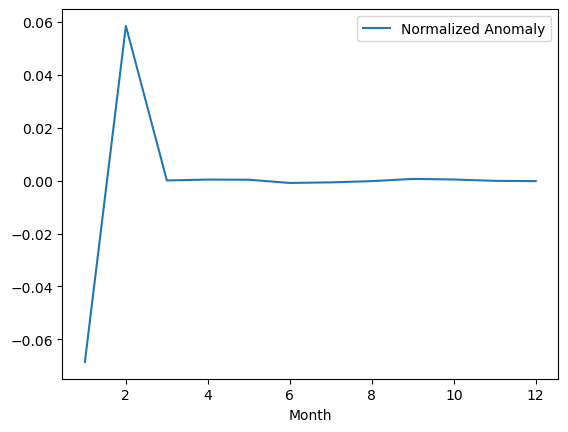

In [76]:
NPI_seasonal.plot()

<Axes: xlabel='Year'>

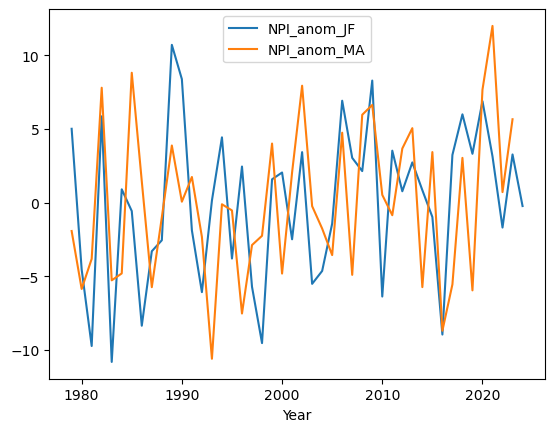

In [64]:
NPI_UB.plot()

In [104]:
NPI_UB_2 = pd.read_csv(fp_NPI_UB_2)

NPI_UB_2['DT'] = pd.to_datetime(NPI_UB_2.Year)
NPI_UB_2['Year'] = NPI_UB_2.DT.dt.year
NPI_UB_2['Month'] = NPI_UB_2.DT.dt.month
NPI_UB_2_seasonal = NPI_UB_2.drop(
    columns=['NPI-total SLP', 'DT', 'Anomaly', 'Anomaly', 'Mean (91-20)', 'stdev (91-20)']
    ).groupby(['Month']).mean().drop(columns=['Year'])
NPI_UB_2 = NPI_UB_2[NPI_UB_2['Month'].isin([1, 2, 3, 4])]
NPI_UB_2['label'] = NPI_UB_2.apply(
    lambda row: 'JF' if row.Month in [1, 2] else 'MA',
    axis=1
    )
# NPI_UB_2 = NPI_UB_2[NPI_UB_2.Year >= 1979]
NPI_UB_2.rename(columns={'Normalized NPI': 'Norm_NPI'}, inplace=True)
NPI_UB_2.drop(columns=['NPI-total SLP', 'DT', 'Month', 'Anomaly', 'Mean (91-20)', 'stdev (91-20)'], inplace=True)
NPI_UB_2 = NPI_UB_2.groupby(['Year', 'label']).mean().reset_index().pivot(
    index='Year', columns='label', values=['Norm_NPI'])
NPI_UB_2.columns = NPI_UB_2.columns.to_series().apply('_'.join)

NPI_UB_2

,Norm_NPI_JF,Norm_NPI_MA
Year,,
1948,8.040,4.630
1949,8.495,-17.215
1950,5.115,-10.290
1951,10.835,-8.470
1952,5.275,-6.060
...,...,...
2021,7.045,-2.930
2022,11.780,8.410
2023,5.680,4.815


<Axes: xlabel='Month'>

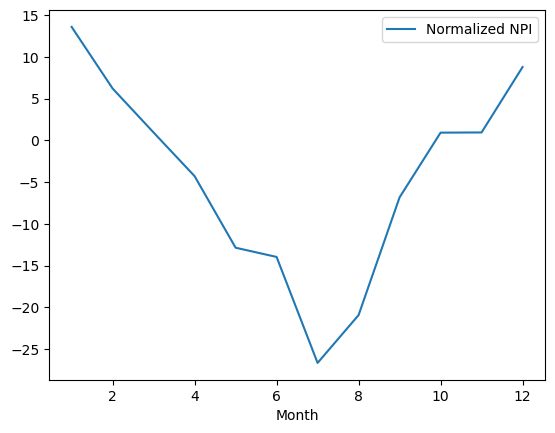

In [105]:
NPI_UB_2_seasonal.plot()

<Axes: xlabel='Year'>

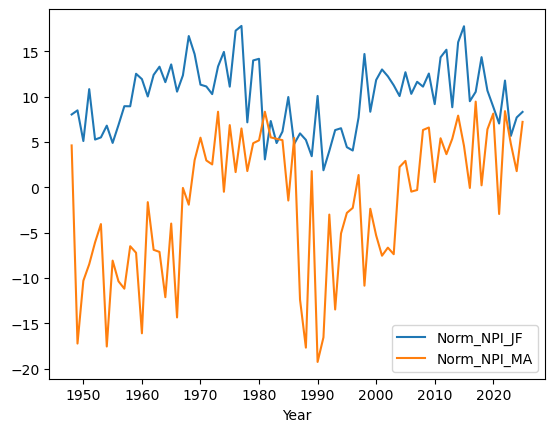

In [106]:
NPI_UB_2.plot()

Text(0.5, 1.0, 'March/April NPI, 3 data sources')

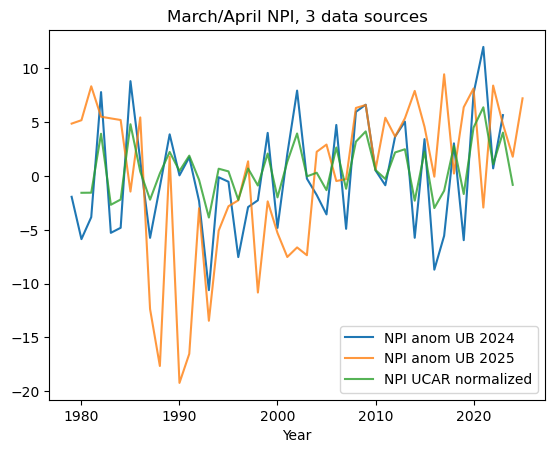

In [114]:
ax = NPI_UB['Norm_NPI_anom_MA'].plot(label='NPI anom UB 2024')
NPI_UB_2.loc[1979:]['Norm_NPI_MA'].plot(ax=ax, alpha=0.8, label='NPI anom UB 2025')
data_npi['NPI_MA'].plot(ax=ax, alpha=0.8, label='NPI UCAR normalized')
plt.legend()
plt.title("March/April NPI, 3 data sources")

<Axes: xlabel='Year'>

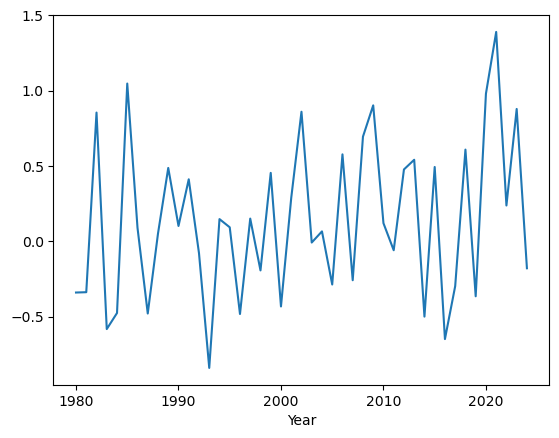

In [51]:
data_npi['NPI_MA'].plot()

#### Load rest of teleconnections from CPC

In [82]:
fp_extra = datadir / f"predictors_raw/teleconnections/{extra}"
with open(fp_extra, 'r') as src:
    txt = src.read().replace('-', ' -')
with open(fp_extra, 'w') as dst:
    dst.write(txt)

In [83]:
columns = ['Year', 'Month', 'NAO', 'EA', 'WP', 'EP/NP', 'PNA', 'EA-WR', 'SCA', 'TNH', 'POL', 'PT', 'P2']
data_extra = pd.read_csv(fp_extra, skiprows=19, delim_whitespace=True, names=columns, engine='python')


data_extra = data_extra.astype(float)
data_extra['Year'] = data_extra['Year'].astype(int)
data_extra.replace(-99.9, npy.nan, inplace=True)
data_extra = data_extra[data_extra['Year'] >= 1980]
data_extra = data_extra[data_extra['Month'].isin([1, 2, 3, 4])]
data_extra['label'] = data_extra.apply(
    lambda row: 'JF' if row.Month in [1, 2] else 'MA',
    axis=1
    )
data_extra.drop(columns=['Month', 'EP/NP', 'PNA', 'TNH', 'PT', 'P2'], inplace=True)
data_extra = data_extra.groupby(['Year', 'label']).mean().reset_index().pivot(
    index='Year', columns='label', values=['NAO', 'EA', 'WP', 'EA-WR', 'SCA', 'POL'])
data_extra.columns = data_extra.columns.to_series().apply('_'.join)

data_extra


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_10248/4088691002.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_extra = pd.read_csv(fp_extra, skiprows=19, delim_whitespace=True, names=columns, engine='python')


,NAO_JF,NAO_MA,EA_JF,EA_MA,WP_JF,WP_MA,EA-WR_JF,EA-WR_MA,SCA_JF,SCA_MA,POL_JF,POL_MA
Year,,,,,,,,,,,,
1980,-0.885,0.265,-0.605,-0.905,-1.105,0.905,0.005,-0.560,0.630,0.945,0.035,-0.400
1981,0.260,-0.700,-1.735,0.040,-0.560,0.285,-0.510,1.135,-0.080,-1.105,1.040,-0.800
1982,-0.345,0.380,-0.155,-0.720,-0.770,0.160,0.810,0.230,-0.020,-0.425,0.420,0.100
1983,0.150,-0.240,-0.230,0.475,-0.470,-0.025,0.890,-0.940,-0.430,0.360,0.195,-0.365
1984,0.895,-0.620,-0.325,-0.650,-1.000,-0.975,-1.920,-0.750,0.425,1.485,-0.330,1.010
1985,-1.690,0.005,-0.460,-0.130,-0.865,0.640,0.020,0.330,0.105,0.095,-0.835,0.550
1986,-0.400,0.300,-0.685,0.215,-1.165,-0.560,-0.590,-0.135,0.550,0.770,0.770,1.210
1987,-1.560,0.885,0.420,-0.385,0.970,0.350,0.395,1.165,-0.170,0.845,0.185,-0.450
1988,0.550,-1.000,0.080,0.295,1.065,0.165,-1.265,-0.920,0.660,-0.235,-0.205,0.850


#### Concatenate full teleconnections dataframe

In [115]:
teleconnections = pd.concat([results, data_pdo, data_extra], axis=1,)
teleconnections

,AO_JF,AO_MA,EP-NP_JF,EP-NP_MA,PNA_JF,PNA_MA,SOI_JF,SOI_MA,Nino1+2_JF,Nino1+2_MA,...,EA_JF,EA_MA,WP_JF,WP_MA,EA-WR_JF,EA-WR_MA,SCA_JF,SCA_MA,POL_JF,POL_MA
Year,,,,,,,,,,,,,,,,,,,,,
1980,-1.5000,-0.9260,0.695,-0.300,0.510,0.510,0.60,-0.85,-0.335,-0.005,...,-0.605,-0.905,-1.105,0.905,0.005,-0.560,0.630,0.945,0.035,-0.400
1981,-0.2240,-0.6075,0.495,-0.080,1.335,0.020,0.15,-1.15,-1.335,-0.640,...,-1.735,0.040,-0.560,0.285,-0.510,1.135,-0.080,-1.105,1.040,-0.800
1982,0.0455,1.2640,1.135,-0.285,-1.475,-1.870,1.20,0.55,-0.525,-1.050,...,-0.155,-0.720,-0.770,0.160,0.810,0.230,-0.020,-0.425,0.420,0.100
1983,-0.2235,-0.6525,-0.310,-0.530,1.155,1.505,-5.90,-2.75,2.340,2.775,...,-0.230,0.475,-0.470,-0.025,0.890,-0.940,-0.430,0.360,0.195,-0.365
1984,0.3010,-1.3350,-1.190,-0.360,0.665,1.245,0.85,0.10,-0.635,-0.550,...,-0.325,-0.650,-1.000,-0.975,-1.920,-0.750,0.425,1.485,-0.330,1.010
1985,-2.1230,0.6015,-0.705,-1.155,0.225,-1.230,0.75,1.60,-1.080,-1.130,...,-0.460,-0.130,-0.865,0.640,0.020,0.330,0.105,0.095,-0.835,0.550
1986,-1.7360,1.0170,0.675,-0.745,0.505,0.180,-0.05,0.65,-0.050,-0.790,...,-0.685,0.215,-1.165,-0.560,-0.590,-0.135,0.550,0.770,0.770,1.210
1987,-1.3105,-0.6800,-0.615,0.025,0.600,1.195,-1.60,-2.20,0.980,1.500,...,0.420,-0.385,0.970,0.350,0.395,1.165,-0.170,0.845,0.185,-0.450
1988,-0.4005,-0.3790,0.500,-0.185,0.700,0.750,-0.40,0.65,-0.145,-0.820,...,0.080,0.295,1.065,0.165,-1.265,-0.920,0.660,-0.235,-0.205,0.850


In [116]:
timestamp = dt.datetime.now().strftime("%Y%m%d%H%M")

In [117]:
outfn = f'teleconnections_{timestamp}.csv'
outpath = datadir / "predictors_final"

teleconnections.to_csv(outpath / outfn, float_format='%.3f')

In [120]:
predictors = pd.concat([teleconnections, seaice], axis=1,).dropna()
predictors

,AO_JF,AO_MA,EP-NP_JF,EP-NP_MA,PNA_JF,PNA_MA,SOI_JF,SOI_MA,Nino1+2_JF,Nino1+2_MA,...,EA-WR_JF,EA-WR_MA,SCA_JF,SCA_MA,POL_JF,POL_MA,Bering_anomaly_JF,Bering_anomaly_MA,Chukchi_anomaly_JF,Chukchi_anomaly_MA
Year,,,,,,,,,,,,,,,,,,,,,
1980,-1.5000,-0.9260,0.695,-0.300,0.510,0.510,0.60,-0.85,-0.335,-0.005,...,0.005,-0.560,0.630,0.945,0.035,-0.400,0.095,0.065,0.000,0.000
1981,-0.2240,-0.6075,0.495,-0.080,1.335,0.020,0.15,-1.15,-1.335,-0.640,...,-0.510,1.135,-0.080,-1.105,1.040,-0.800,0.065,-0.045,0.000,0.000
1982,0.0455,1.2640,1.135,-0.285,-1.475,-1.870,1.20,0.55,-0.525,-1.050,...,0.810,0.230,-0.020,-0.425,0.420,0.100,-0.080,-0.055,0.000,0.000
1983,-0.2235,-0.6525,-0.310,-0.530,1.155,1.505,-5.90,-2.75,2.340,2.775,...,0.890,-0.940,-0.430,0.360,0.195,-0.365,0.065,0.045,0.000,0.000
1984,0.3010,-1.3350,-1.190,-0.360,0.665,1.245,0.85,0.10,-0.635,-0.550,...,-1.920,-0.750,0.425,1.485,-0.330,1.010,-0.015,0.150,-0.005,0.000
1985,-2.1230,0.6015,-0.705,-1.155,0.225,-1.230,0.75,1.60,-1.080,-1.130,...,0.020,0.330,0.105,0.095,-0.835,0.550,-0.185,0.090,0.000,0.005
1986,-1.7360,1.0170,0.675,-0.745,0.505,0.180,-0.05,0.65,-0.050,-0.790,...,-0.590,-0.135,0.550,0.770,0.770,1.210,-0.055,0.040,0.005,0.000
1987,-1.3105,-0.6800,-0.615,0.025,0.600,1.195,-1.60,-2.20,0.980,1.500,...,0.395,1.165,-0.170,0.845,0.185,-0.450,-0.005,-0.005,0.000,0.000
1988,-0.4005,-0.3790,0.500,-0.185,0.700,0.750,-0.40,0.65,-0.145,-0.820,...,-1.265,-0.920,0.660,-0.235,-0.205,0.850,-0.070,0.120,-0.020,0.005


In [121]:
outfn = f'predictors_tele_seaice_{timestamp}.csv'
outpath = datadir / "predictors_final"

predictors.to_csv(outpath / outfn, float_format='%.3f')